#Projeto Reconhecimento de Digitos
###Grupo: Vitor Zimbrunes Pamplona, Yan borges Simões de Araújo
###Matrícula: 20190038570, 20190036216
###Data: 04/04/2023
###Última alteração: 27/04/2023

# IMPORTAÇÃO

In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import random as ra

# CARREGAMENTO DOS DADOS

In [ ]:
#Carrega os dados
data = np.loadtxt("train.csv", delimiter=";", dtype=str)
teste = np.loadtxt("test.csv", delimiter=";", dtype=str)
#Preparação dos dados
data = np.delete(data, 0, 0)
data = data.astype('int')

teste = np.delete(teste, 0, 0)
teste = teste.astype('int')

#Coluna dos números para treino
data_label = data[:, 0]
data = np.delete(data, 0, 1)

teste_label = teste[:, 0]
teste = np.delete(teste, 0, 1)


# INTENSIDADE

In [ ]:
I = data[:, 0:].sum(axis=1)/255
print(I)
IT = teste[:, 0:].sum(axis=1)/255
print(IT)

[145.43529412 118.57647059 127.6        ... 110.7254902   99.30588235
 101.17254902]
[147.93333333 131.05490196 134.89019608 ...  95.14117647 106.88235294
 117.63921569]


# SIMETRIA

In [ ]:
#Criação da matrix para simetria
data_matrix = []
for i in range(len(data)):
  data_matrix.append(data[i].reshape(28,28))

data_matrix = np.array(data_matrix)

#Simetria Vertical
Soma_sim = []
Sv = []

for k in range(len(data_matrix)):
  for i in range(data_matrix[k].shape[0]):
    soma = 0
    for j in range((data_matrix[k].shape[1]) - 14):
      soma = soma + LA.norm(data_matrix[i][j] - data_matrix[i][27-j])
    Soma_sim.append(round(soma,2))
  Sv.append(sum(Soma_sim)/255)

#Simetria Horizontal
Soma_sim2 = []
Sh = []

for k in range(len(data_matrix)):
  for j in range(data_matrix[k].shape[1]):
    soma1 = 0
    for i in range(data_matrix[k].shape[0] - 14):
      soma1 = soma1 + LA.norm(data_matrix[i][j] - data_matrix[27-i][j])
    Soma_sim2.append(round(soma1,2))
  Sh.append(sum(Soma_sim2)/255)

#Calculo das Simetrias
Sv = np.array(Sv)
Sh = np.array(Sh)
Sim = Sv + Sh

Sim

array([1.18979016e+03, 2.37958031e+03, 3.56937047e+03, ...,
       2.59850170e+06, 2.59969149e+06, 2.60088128e+06])

#Simetria Otimização do Codigo

In [ ]:
data_matrix_treino = []
for i in range(len(X_train)):
    data_matrix_treino.append(X_train[i].reshape(28, 28))

Sv_treino = []
Sh_treino = []
for k in range(len(data_matrix_treino)):
    soma_v_treino = 0
    soma_h_treino = 0
    for i in range(data_matrix_treino[k].shape[0]):
        for j in range((data_matrix_treino[k].shape[1]) - 14):
            soma_v_treino += LA.norm(data_matrix_treino[k][i][j] - data_matrix_treino[k][i][27 - j])
            soma_h_treino += LA.norm(data_matrix_treino[k][i][j] - data_matrix_treino[k][27 - i][j])
    Sv_treino.append(soma_v_treino / (255 * data_matrix_treino[k].shape[0]))
    Sh_treino.append(soma_h_treino / (255 * data_matrix_treino[k].shape[1]))

Sv_treino = np.array(Sv_treino)
Sh_treino = np.array(Sh_treino)
Sim_treino = Sv_treino + Sh_treino

Sim_treino

array([6.59831933, 5.32422969, 5.37955182, ..., 4.33039216, 4.4942577 ,
       5.39705882])

# CRIANDO DATASET DE TREINO E TESTE

In [ ]:
train_redu = np.c_[data_label, I, Sim]
train_redu = train_redu.tolist()

#test_redu = np.c_[teste_label, IT, SimT]

# DATASET QUE CONTÉM O NÚMERO 5

In [ ]:
train1x5 = []
for i in range(len(train_redu)):
  if train_redu[i][0] == 1 or train_redu[i][0] == 5:
    train1x5.append(train_redu[i])


In [ ]:
train1x5

# FUNÇÃO PARA CRIAR X E y

In [ ]:
def get():
  X = []
  y = []
  i = 0
  while i < len(train1x5):
    x = train1x5[i][0]
    x1 = [train1x5[i][1], train1x5[i][2]]

    if(x == 1) :
      y.append(+1)
    else :
      y.append(-1)
                
    X.append(x1)
    i += 1          
  return X,y

# FUNÇÃO PARA PREDIÇÃO E ESTIMAÇÃO

In [ ]:
def pred(y):
  cont = 0
  cont1 = 0
  for i in range(len(y)):
    if(y[i] == +1):
      cont+= 1
    else:
      cont1+= 1
  return cont,cont1

def estima(cont,cont1,y):
  print(f'% de 1: {round(cont/len(y),1)*100}%\n% de 5: {round(cont1/len(y),2)*100}%')

In [ ]:
X, y = get()
cont, cont1 = pred(y)
estima(cont,cont1,y)

% de 1: 50.0%
% de 5: 49.0%


# FUNÇÃO PARA PLOTAR GRÁFICO

In [ ]:
def draw(X, y):
    #plota os pontos aleatórios de entrada da regressao linear
    xP = [X[i][0] for i in range(len(train1x5)) if(y[i] > 0)]
    yP = [X[i][1] for i in range(len(train1x5)) if(y[i] > 0)]
    xN = [X[i][0] for i in range(len(train1x5)) if(y[i] < 0)]
    yN = [X[i][1] for i in range(len(train1x5)) if(y[i] < 0)]

    plt.scatter(xP, yP, color='blue', marker='o', s=30)
    plt.scatter(xN, yN, color='red', marker='x', s=30)

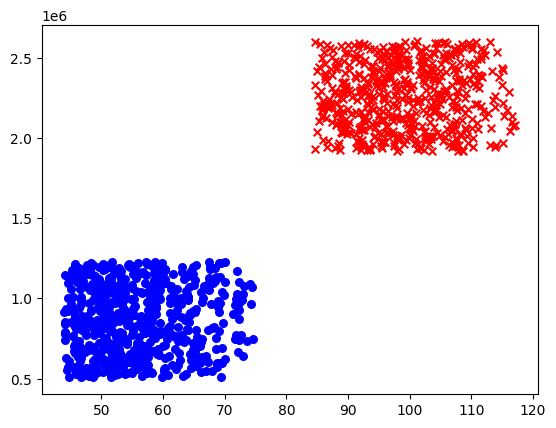

In [ ]:
draw(X,y)

#PLA

In [ ]:
class PLA():
  def get_w(self):
    return self.w
    
  def set_w(self, w):
    self.w = w

  def execute(self, _X, y):
    X = np.array(_X)
    self.w = np.zeros(len(X[0]))  # define o vetor de pesos com o tamanho do número de recursos
    bestW, bestError = self.w, len(y)
    n_updates = 0 # contador de atualizações no vetor de pesos

    for iter in range(1000):
      hasWrongClassifiedPoint = False
      
      # Verifica se algum ponto é classificado incorretamente
      for i in range(len(y)):
        if(np.sign(np.dot(self.w, X[i])) != y[i]):
          self.w += y[i] * X[i]
          n_updates += 1 # incrementa o contador
          hasWrongClassifiedPoint = True
                    
        if not hasWrongClassifiedPoint:
          break
                    
      # Verifica se essa iteração produziu o menor erro até agora
      eIN = self.errorIN(X, y)
      if eIN < bestError:
        bestError = eIN
        bestW = self.w

      # Verifica se houve atualizações no vetor de pesos nas últimas iterações
      if n_updates == 0 and iter > 10:
        break
      elif n_updates > 0:
        n_updates = 0
                
    self.w = bestW

                    
  def getOriginalY(self, originalX):
    return (-self.w[0] - self.w[1]*originalX) / self.w[2]
    
  def h(self, x):
    return np.sign(np.dot(self.w, x))
    
  def errorIN(self, X, y):
    return sum([np.sign(np.dot(self.w, X[i])) != y[i] for i in range(len(y))])


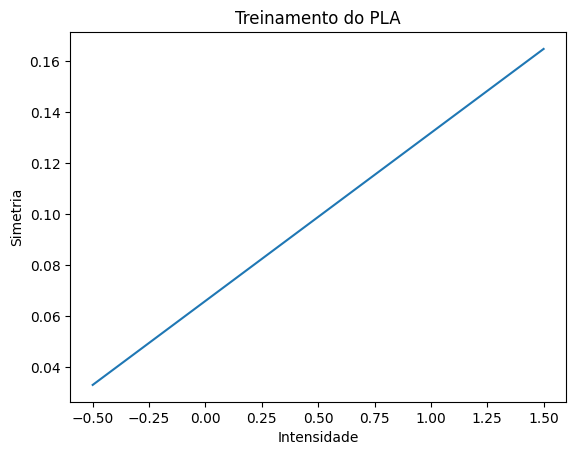

In [ ]:
import matplotlib.pyplot as plt

# Crie o objeto PLA e treine-o
pla = PLA()
pla.execute(X, y)

# Calcule a linha de decisão
w = pla.get_w()
slope = -w[0] / w[1]
intercept = -w[0] / w[1]

# Plot os pontos de treinamento
#plt.scatter(X[:, 0], X[:, 1], c=y)

# Plot a linha de decisão
x_axis = np.linspace(-0.5, 1.5, 100)
y_axis = slope * x_axis + intercept
plt.plot(x_axis, y_axis)

# Defina os rótulos do gráfico
plt.title('Treinamento do PLA')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')

# Mostre o gráfico
plt.show()


#Regressão Linear

In [ ]:
class LinearRegression:
    def execute(self, _X, _y):
        X =  np.array(_X)
        y =  np.array(_y)
        xTx = np.dot(X.transpose(), X)
        inverse = np.linalg.inv(xTx)
        self.w = np.dot(np.dot( inverse, X.transpose()), y)
    
    def predict(self, _x):
        return [np.dot(self.w, xn) for xn in _x]
    
    def get_w(self):
        return self.w
    
    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [ ]:
rX = [[1,x[0], x[1]] for x in  X]

lr = LinearRegression()
lr.execute(rX,y)
pred = lr.predict(rX)

Error in : 100.0%


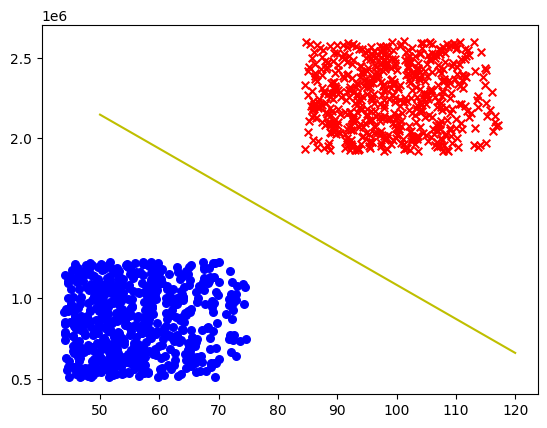

In [ ]:
#desenha a reta inferida pela regressao linear
xOri = [50, 120]
yOri = [lr.getRegressionY(xOri[0]), lr.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')

#plota os pontos classificados pela RL com bolinha azul(1) e vermelha(5)
xP = [X[i][0] for i in range(len(train1x5)) if(pred[i] > 0)]
yP = [X[i][1] for i in range(len(train1x5)) if(pred[i] > 0)]
xN = [X[i][0] for i in range(len(train1x5)) if(pred[i] < 0)]
yN = [X[i][1] for i in range(len(train1x5)) if(pred[i] < 0)]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='x', s=30)

#Computando o erro dentro da amostra (Ein)
'''
eIN = 0

for i in range(len(train1x5)):
  if(pred[i] != y[i]):
    eIN += 1
eIN = eIN / len(train1x5)

print("Ein: " + str(eIN*100))
'''
errorIN = 0
for pn, yn in zip(pred, y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/len(train1x5) * 100) + "%")

#Regressão Logistica

In [ ]:
class LogisticRegression:
    def __init__(self, eta=0.1, tmax=1000, batch_size=32):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = batch_size

    def fit(self, _X, _y):
        X = np.array(_X)
        y = np.array(_y)

        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        d = X.shape[1]
        N = X.shape[0]
        w = np.zeros(d)

        for i in range(self.tmax):
            vsoma = np.zeros(d)

            # Escolhendo o lote de entradas
            if self.batch_size < N:
                indices = np.random.choice(N, self.batch_size, replace=False)
                batchX = X[indices]
                batchY = y[indices]
            else:
                batchX = X
                batchY = y

            # Computando o gradiente no ponto atual
            for xn, yn in zip(batchX, batchY):
                vsoma += (yn * xn) / (1 + np.exp(yn * np.dot(w, xn)))

            gt = vsoma / self.batch_size

            # Condicao de parada: se ||deltaF|| < epsilon (0.0001)
            if np.linalg.norm(gt) < 0.0001:
                break

            w = w + self.eta * gt

        self.w = w

    def predict_prob(self, X):
        X = np.array(X)
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return 1 / (1 + np.exp(-np.dot(X, self.w)))

    def predict(self, X):
        return np.where(self.predict_prob(X) >= 0.5, 1, -1)

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0] + shift - self.w[1] * regressionX) / self.w[2]


In [ ]:
X, y = get()
rX = [[1,x[0], x[1]] for x in  X]

logr = LogisticRegression()
logr.fit(rX,y)
pred = logr.predict_prob(rX)
print(pred)

<ipython-input-321-54bb15b1f7a8>:31: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp(yn * np.dot(w, xn)))


[1. 1. 1. ... 1. 1. 1.]


Error in : 48.64864864864865%


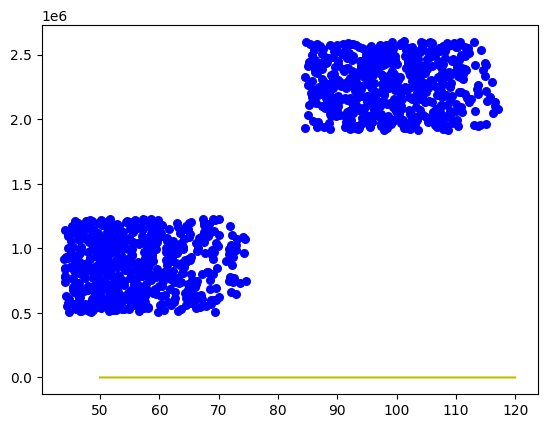

In [ ]:
xOri = [50, 120]
yOri = [logr.getRegressionY(xOri[0]), logr.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')

#plota os pontos classificados pela RL com bolinha azul(1) e vermelha(5)
xP = [X[i][0] for i in range(len(train1x5)) if(pred[i] > 0)]
yP = [X[i][1] for i in range(len(train1x5)) if(pred[i] > 0)]
xN = [X[i][0] for i in range(len(train1x5)) if(pred[i] < 0)]
yN = [X[i][1] for i in range(len(train1x5)) if(pred[i] < 0)]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='x', s=30)

pred = logr.predict(rX)

errorIN = 0
for pn, yn in zip(pred, y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/len(train1x5) * 100) + "%")